# **Face Recognition using CNN**
# Pengenalan Wajah secara Real-Time menggunakan Convolutional Neural Networks (CNN)

 # **Step1:**
 
Pertama-tama, Anda harus memasukkan pustaka/libraries yang diperlukan:

In [2]:
import keras                                                                    #untuk membangun dan melatih model neural networks.
from keras.models import Sequential                                             #untuk membuat model neural network secara sekuensial.
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout          #Mengimpor berbagai layer yang digunakan dalam model CNN, seperti Conv2D (layer konvolusi 2D), MaxPooling2D (layer pemampatan maksimal 2D), Dense (layer terhubung penuh), Flatten (layer untuk meratakan input), dan Dropout (layer dropout untuk mencegah overfitting).
from keras.optimizers import Adam                                               #untuk mengoptimalkan proses pembelajaran model.
from keras.callbacks import TensorBoard                                         #untuk memantau pelatihan model menggunakan TensorBoard.

import numpy as np                                                              #untuk operasi numerik pada array dan matriks.
import pandas as pd                                                             #untuk manipulasi dan analisis data.
import matplotlib.pyplot as plt                                                 #untuk visualisasi data dan hasil model.
from sklearn.model_selection import train_test_split                            #untuk membagi data menjadi set pelatihan dan pengujian.

from sklearn.metrics import confusion_matrix                                    #untuk menghasilkan matriks confusion.
from sklearn.metrics import classification_report                               #untuk menghasilkan laporan klasifikasi.
from sklearn.metrics import roc_curve, auc                                      #untuk menghasilkan kurva ROC (Receiver Operating Characteristic) dan area di bawah kurva ROC.
from sklearn.metrics import accuracy_score                                      #untuk menghitung akurasi model.
from keras.utils import np_utils                                                #untuk mengonversi label menjadi bentuk yang sesuai untuk penggunaan dengan model.
import itertools                                                                
#Semua library tersebut diperlukan untuk menjalankan tugas pengenalan wajah menggunakan CNN.

# **Step2:**

* Load Dataset :

Setelah memuat Dataset, Anda harus menormalkan setiap gambar.

Catatan: gambar adalah matriks Uint8 piksel dan untuk perhitungan, Anda perlu mengubah format gambar menjadi float atau double



In [3]:
#load dataset
#untuk memuat file data dengan format NumPy .npz yang disebut 'ORL_faces.npz'. File ini berisi data gambar wajah yang akan digunakan untuk pelatihan dan pengujian model.
data = np.load('ORL_faces.npz') 

# load the "Train Images"
#Menyimpan data gambar wajah pelatihan dalam variabel x_train. Data ini akan digunakan sebagai input untuk melatih model.
x_train = data['trainX']

#normalize every image
#Mengonversi tipe data gambar wajah pelatihan menjadi float32 dan melakukan normalisasi dengan membaginya dengan 255. 
#Normalisasi ini dilakukan agar intensitas piksel dalam rentang antara 0 dan 1, yang berguna untuk pelatihan model yang lebih baik.
x_train = np.array(x_train,dtype='float32')/255

x_test = data['testX'] #Menyimpan data gambar wajah pengujian dalam variabel x_test. Data ini akan digunakan sebagai input untuk menguji model.
x_test = np.array(x_test,dtype='float32')/255 #Mengonversi tipe data gambar wajah pengujian menjadi float32 dan melakukan normalisasi dengan membaginya dengan 255.

#load the Label of Images
#Menyimpan label (kelas) yang sesuai dengan gambar wajah pelatihan dan pengujian dalam variabel y_train dan y_test secara berturut-turut. 
#Label ini akan digunakan sebagai target/output yang diinginkan saat melatih dan menguji model.
y_train= data['trainY']
y_test= data['testY']

# show the train and test Data format
print('x_train : {}'.format(x_train[:])) #Mencetak nilai dari x_train. Ini memberikan Anda beberapa informasi tentang data pelatihan yang dimuat.
print('Y-train shape: {}'.format(y_train)) #Mencetak bentuk dari y_train. Ini memberikan Anda informasi tentang jumlah sampel data pelatihan dan dimensi kelas.
print('x_test shape: {}'.format(x_test.shape)) #Mencetak bentuk dari x_test. Ini memberikan Anda informasi tentang jumlah sampel data pengujian dan dimensi gambar wajah.

#sintaks diatas  memuat data gambar wajah pelatihan dan pengujian, serta label yang sesuai dengan data tersebut. 
#Selanjutnya, data tersebut dinormalisasi dan dicetak untuk memeriksa dan memahami format dan struktur datanya.

x_train : [[0.1882353  0.19215687 0.1764706  ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313726 ... 0.1254902  0.13333334 0.13333334]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196079 0.11372549]
 ...
 [0.44705883 0.45882353 0.44705883 ... 0.38431373 0.3764706  0.38431373]
 [0.4117647  0.4117647  0.41960785 ... 0.21176471 0.18431373 0.16078432]
 [0.45490196 0.44705883 0.45882353 ... 0.37254903 0.39215687 0.39607844]]
Y-train shape: [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 1

# **Step 3:**

Split DataSet : Validation data and Train 

Validation DataSet: set data ini digunakan untuk meminimalkan overfitting, jika akurasi pada set data pelatihan meningkat, tetapi akurasi pada set data validasi tetap sama atau menurun, maka Anda melakukan overfitting pada jaringan syaraf Anda dan Anda harus menghentikan pelatihan.

 * Catatan: kami biasanya menggunakan 30 persen dari setiap dataset sebagai data validasi, tetapi di sini kami hanya menggunakan 5 persen karena jumlah gambar dalam dataset ini sangat sedikit.


In [4]:
#membagi data pelatihan menjadi set pelatihan dan validasi
#x_train: Input data pelatihan yang akan dibagi.
#y_train: Target/output data pelatihan yang akan dibagi.
#test_size=.05: Menentukan proporsi data yang akan dialokasikan untuk validasi. Di sini, 5% dari data pelatihan akan dialokasikan untuk validasi.
#random_state=1234: Menentukan nilai seed untuk mengacak pemilihan sampel data. Dalam hal ini, seed adalah 1234, yang memastikan bahwa pemilihan sampel data yang diacak akan konsisten pada setiap eksekusi.

x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.05, random_state=1234,)

#terdapat empat variabel: x_train (data pelatihan), y_train (label pelatihan), x_valid (data validasi), dan y_valid (label validasi). Variabel ini akan digunakan untuk melatih dan memvalidasi model CNN .

# **Step 4:**

untuk menggunakan CNN, kita perlu mengubah Ukuran gambar (Ukuran gambar harus sama)

In [5]:
im_rows=112  
im_cols=92 
#Menentukan ukuran baris (im_rows) dan kolom (im_cols) gambar wajah yang akan digunakan dalam model. Di sini, ukuran gambar wajah adalah 112x92 piksel.

batch_size=512 #Menentukan ukuran batch yang akan digunakan saat melatih model. 
im_shape=(im_rows, im_cols, 1) #Menentukan bentuk gambar wajah yang akan digunakan dalam model. im_shape memiliki tiga dimensi: ukuran baris, ukuran kolom, dan saluran. Saluran adalah 1 karena gambar wajah berada dalam skala keabuan (grayscale).

#change the size of images
##mengubah dimensi data pengujian menjadi [jumlah sampel, ukuran baris, ukuran kolom, saluran].
x_train = x_train.reshape(x_train.shape[0], *im_shape) #Mengubah bentuk (reshape) data gambar wajah pelatihan (x_train) ke bentuk yang sesuai dengan im_shape 
x_test = x_test.reshape(x_test.shape[0], *im_shape)   #Mengubah bentuk data gambar wajah pengujian (x_test) ke bentuk yang sesuai dengan im_shape
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape) #Mengubah bentuk data gambar wajah validasi (x_valid) ke bentuk yang sesuai dengan im_shape

print('x_train shape: {}'.format(y_train.shape[0])) #Mencetak bentuk dari x_train. Ini memberikan informasi tentang jumlah sampel data pelatihan yang telah diubah bentuknya.
print('x_test shape: {}'.format(y_test.shape)) #Mencetak bentuk dari x_test. Ini memberikan informasi tentang jumlah sampel data pengujian yang telah diubah bentuknya.

#untuk memastikan bahwa semua data gambar wajah memiliki bentuk yang sesuai dengan input yang diterima oleh model CNN. 
#Selain itu, langkah ini juga mencetak informasi tentang bentuk data pelatihan dan pengujian setelah diubah bentuknya.

x_train shape: 228
x_test shape: (160,)


# Step 5


Build CNN model:
 CNN have 3 main layer: 
 * 1-Convolotional layer 
 * 2- pooling layer  
 * 3- fully connected layer
 
kita dapat membangun arsitektur baru CNN dengan mengubah jumlah dan posisi layer.
 

In [6]:
#membangun model Convolutional Neural Network (CNN) untuk pengenalan wajah
#filters= the depth of output image or kernels

cnn_model= Sequential([  #Membuat objek model Sequential dengan menggunakan kelas Sequential dari Keras. Model ini akan menjadi kerangka utama untuk membangun arsitektur CNN.
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape), #Menambahkan layer konvolusi 2D ke model CNN
    MaxPooling2D(pool_size=2), #Menambahkan layer pemampatan maksimal 2D ke model CNN. pool_size=2 menentukan ukuran jendela pemampatan maksimal yang akan digunakan.
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(), #Menambahkan layer Flatten ke model CNN. Layer ini digunakan untuk meratakan output dari layer sebelumnya menjadi vektor satu dimensi, sehingga dapat digunakan sebagai input untuk layer terhubung penuh.
    Dense(2024, activation='relu'), #Menambahkan layer terhubung penuh (fully connected) ke model CNN dengan 2024 unit. activation='relu' menentukan fungsi aktivasi ReLU yang digunakan.
     Dropout(0.5), #untuk mencegah overfitting dengan secara acak mengabaikan beberapa unit selama proses pelatihan.
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax') 
#Menambahkan layer terhubung penuh terakhir dengan 20 unit, yang sesuai dengan jumlah kelas (output) yang akan dihasilkan. Fungsi aktivasi yang digunakan adalah softmax, yang menghasilkan probabilitas untuk setiap kelas.
])

#Mengompilasi model CNN yang telah dibangun. Dalam langkah ini, Anda menentukan fungsi loss yang akan digunakan (sparse_categorical_crossentropy), 
#optimizer yang akan digunakan (Adam dengan learning rate 0.0001), dan metrik evaluasi (akurasi) yang akan digunakan selama pelatihan.
cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

#Model ini akan digunakan untuk melatih dan menguji pengenalan wajah menggunakan dataset yang telah dipersiapkan sebelumnya.

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


**Menampilkan parameter model.**

In [8]:
#summary() digunakan untuk mencetak informasi tentang arsitektur model CNN yang telah dibuat, termasuk jumlah total parameter yang dapat dipelajari, dimensi output setiap layer, dan jumlah parameter yang perlu dihitung saat melakukan pelatihan.
cnn_model.summary()

#melihat output berupa ringkasan model CNN yang mencakup informasi seperti "Layer (type)", "Output Shape", dan "Param #". 
#Ini akan memberikan gambaran tentang jumlah total parameter dalam model dan dimensi output setiap layer.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 43, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 24624)             0         
                                                                 
 dense (Dense)               (None, 2024)              4

# **Step 6:**

Train the Model

*Catatan: Anda dapat mengubah jumlah epochs


In [9]:
#melatih model CNN menggunakan data pelatihan dan validasi yang telah dipersiapkan sebelumnya
#Memulai proses pelatihan model dengan menggunakan fungsi fit() pada objek model CNN yang telah dibuat sebelumnya.
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=250, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

#batch_size=512: Menentukan ukuran batch yang akan digunakan selama pelatihan. Ini menunjukkan bahwa dalam setiap iterasi pelatihan, 512 sampel data akan diproses sebelum melakukan pembaruan parameter model.
#epochs=250: Menentukan jumlah epochs (iterasi) yang akan dilakukan selama pelatihan. Setiap epoch akan melalui seluruh dataset pelatihan.
#verbose=2: Mengatur tingkat kecerahan (verbosity) saat melakukan pelatihan. Dalam hal ini, verbose=2 akan mencetak informasi tentang setiap epoch yang dilalui selama pelatihan.

Epoch 1/250
1/1 - 8s - loss: 2.9996 - accuracy: 0.0570 - val_loss: 2.9898 - val_accuracy: 0.0833 - 8s/epoch - 8s/step
Epoch 2/250
1/1 - 9s - loss: 2.9956 - accuracy: 0.0351 - val_loss: 2.9871 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 3/250
1/1 - 9s - loss: 2.9906 - accuracy: 0.0658 - val_loss: 2.9870 - val_accuracy: 0.0000e+00 - 9s/epoch - 9s/step
Epoch 4/250
1/1 - 7s - loss: 3.0148 - accuracy: 0.0526 - val_loss: 2.9851 - val_accuracy: 0.0833 - 7s/epoch - 7s/step
Epoch 5/250
1/1 - 6s - loss: 2.9913 - accuracy: 0.0439 - val_loss: 2.9847 - val_accuracy: 0.0833 - 6s/epoch - 6s/step
Epoch 6/250
1/1 - 7s - loss: 2.9905 - accuracy: 0.0614 - val_loss: 2.9845 - val_accuracy: 0.0833 - 7s/epoch - 7s/step
Epoch 7/250
1/1 - 6s - loss: 3.0221 - accuracy: 0.0482 - val_loss: 2.9841 - val_accuracy: 0.0833 - 6s/epoch - 6s/step
Epoch 8/250
1/1 - 7s - loss: 2.9947 - accuracy: 0.0570 - val_loss: 2.9825 - val_accuracy: 0.0000e+00 - 7s/epoch - 7s/step
Epoch 9/250
1/1 - 6s - loss: 2.9877 - accura

**Mengevaluasi data pengujian**


In [10]:
#melakukan evaluasi performa model CNN pada data pengujian yang telah dipisahkan sebelumnya
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0) #Menggunakan fungsi evaluate() pada model CNN untuk mengevaluasi performa model pada data pengujian.
#np.array(x_test), np.array(y_test): Menyediakan data pengujian (x_test) dan label pengujian (y_test) sebagai input untuk evaluasi model. 
#Data ini dikonversi menjadi array NumPy untuk memastikan kompatibilitas dengan model.
#verbose=0: Mengatur tingkat kecerahan (verbosity) saat melakukan evaluasi. Dalam hal ini, verbose=0 menghindari pencetakan informasi yang tidak perlu selama evaluasi.

print('test los {:.4f}'.format(scor[0])) #Mencetak nilai loss (kerugian) model pada data pengujian dengan format desimal 4 angka setelah titik desimal.
print('test acc {:.4f}'.format(scor[1])) #Mencetak nilai akurasi model pada data pengujian dengan format desimal 4 angka setelah titik desimal.

#Setelah evaluasi selesai, variabel scor akan berisi nilai loss dan akurasi model pada data pengujian.

test los 0.2929
test acc 0.9438


# **Step 7:**

plot the result

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


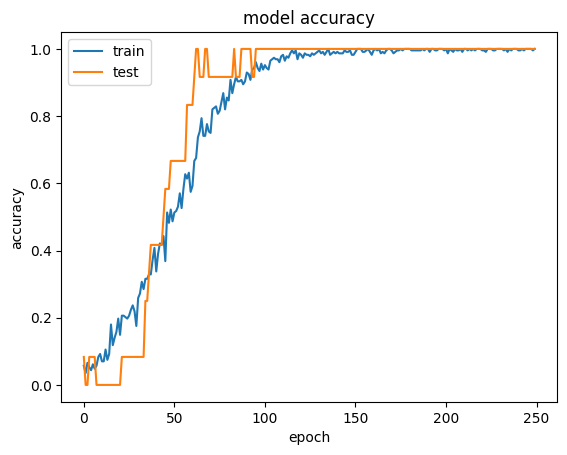

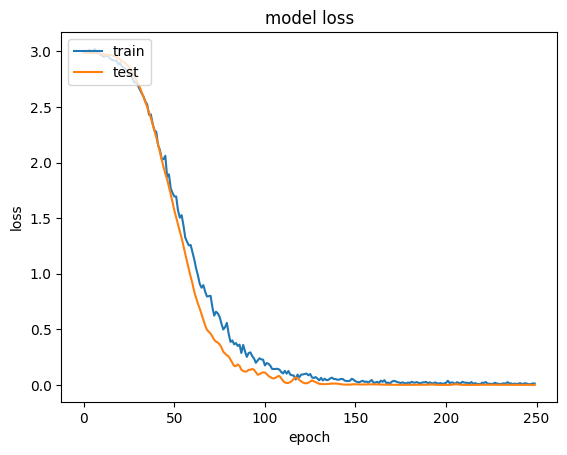

In [17]:
#menganalisis dan memvisualisasikan histori pelatihan model CNN
# list all data in history
print(history.history.keys()) #objek history berisi histori pelatihan seperti akurasi, loss, dan metrik lainnya. Dengan mencetak kunci ini, Anda dapat melihat daftar statistik yang tersedia.
# summarize history for accuracy

plt.plot(history.history['accuracy'])                        #Membuat grafik garis untuk menampilkan histori akurasi pelatihan pada setiap epoch
plt.plot(history.history['val_accuracy'])                    #Membuat grafik garis untuk menampilkan histori akurasi validasi pada setiap epoch
plt.title('model accuracy')                             #Memberikan judul grafik akurasi model.
plt.ylabel('accuracy')                                  #Memberikan label sumbu y pada grafik, yang menunjukkan bahwa ini adalah grafik untuk akurasi.
plt.xlabel('epoch')                                     #Memberikan label sumbu x pada grafik, yang menunjukkan bahwa ini adalah grafik yang menampilkan setiap epoch.
plt.legend(['train', 'test'], loc='upper left')         #Menambahkan legenda pada grafik untuk memberikan informasi tentang data yang ditampilkan
plt.show()                                              #Menampilkan grafik akurasi.
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#yang pertama adalah grafik akurasi model pada setiap epoch untuk data pelatihan dan validasi. 
#Yang kedua adalah grafik loss (kerugian) model pada setiap epoch untuk data pelatihan dan validasi.

# step 8

Plot Confusion Matrix

5/5 [==============================] - 1s 243ms/step
Accuracy: 
0.94375
Confusion matrix, without normalization
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
Confusion matrix, without n

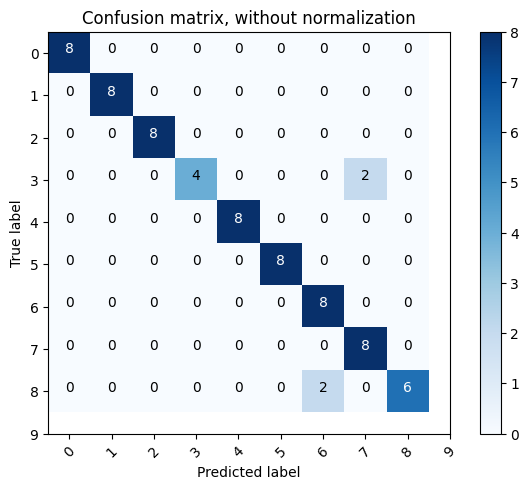

Confusion matrix, without normalization


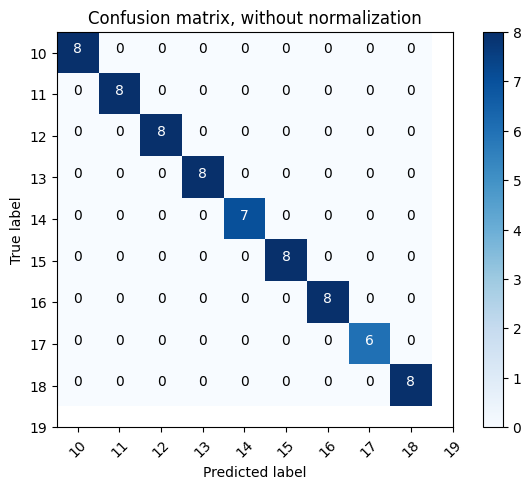

Confusion matrix:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 4 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 2 0 6 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8 0 0]
 [0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 6 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 8]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1

In [21]:
predicted = cnn_model.predict(x_test)
ynew = np.argmax(predicted, axis=1)

Acc = accuracy_score(y_test, ynew)
print("Accuracy: ")
print(Acc)

cnf_matrix = confusion_matrix(np.array(y_test), ynew)

y_test1 = np_utils.to_categorical(y_test, 20)

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[1:10, 1:10], classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], title='Confusion matrix, without normalization')

plt.figure()
plot_confusion_matrix(cnf_matrix[11:20, 11:20], classes=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19], title='Confusion matrix, without normalization')

print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))
